In [1]:
pip install tensorflow

     -------------------------------------- 61.0/61.0 kB 651.3 kB/s eta 0:00:00
   ---------------------------------------- 15.8/15.8 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [2]:
(xtrain,ytrain),(xtest,ytest) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 73s 0us/step


In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
ytrain[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [5]:
ytest = ytest.reshape(-1,)
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [6]:
siniflar = ["ucak","otomobil","kus","kedi","geyik","kopek","kurbaga","at","gemi","kamyon"]

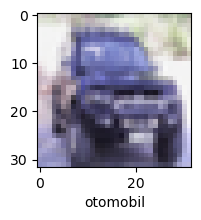

In [14]:
def ornek(x,y,indeks):
    plt.figure(figsize=(15,2))
    plt.imshow(x[indeks])
    plt.xlabel(siniflar[y[indeks]])
    
ornek(xtest,ytest,9)    

In [15]:
xtrain = xtrain/255

In [16]:
xtest = xtest/255

In [18]:
from tensorflow.keras import Sequential

In [26]:
models = models.Sequential([
    layers.Conv2D(filters=32,kernel_size = (3,3),activation = "relu",input_shape = (32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(10,activation="softmax")
])

In [30]:
models.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [31]:
models.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 42s 26ms/step - loss: 1.4737 - accuracy: 0.4697
Epoch 2/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1167 - accuracy: 0.6104
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9931 - accuracy: 0.6555
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9116 - accuracy: 0.6846
Epoch 5/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8499 - accuracy: 0.7072
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7992 - accuracy: 0.7239
Epoch 7/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7508 - accuracy: 0.7388
Epoch 8/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7124 - accuracy: 0.7537
Epoch 9/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6763 - accuracy: 0.7673
Epoch 10/15
1563/1563 [==============================] - 29s 18m

In [32]:
models.evaluate(xtest,ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.9775 - accuracy: 0.6915


[0.9774944186210632, 0.6915000081062317]

In [40]:
ypred = models.predict(xtest)
ypred[:3]

313/313 [==============================] - 1s 4ms/step


array([[7.6938979e-04, 1.5499347e-05, 5.7445284e-02, 8.8877231e-01,
        1.4229642e-03, 1.2174937e-02, 2.2389406e-02, 1.0396454e-05,
        1.6980510e-02, 1.9345842e-05],
       [1.6123362e-02, 1.4036596e-02, 6.9782163e-07, 5.6101626e-08,
        5.3870403e-10, 2.3638336e-10, 1.5054413e-10, 1.3408483e-10,
        9.6980941e-01, 2.9852537e-05],
       [6.0643861e-03, 5.4194212e-01, 1.8241866e-03, 8.0703096e-03,
        1.4280084e-02, 2.2916959e-03, 6.0293329e-05, 5.4011066e-03,
        3.6269799e-01, 5.7367895e-02]], dtype=float32)

In [41]:
ypred2 = [np.argmax(element) for element in ypred]
ypred2[:3]

[3, 8, 1]

In [42]:
ytest[:3]

array([3, 8, 8], dtype=uint8)

In [44]:
ypred2[:10]

[3, 8, 1, 0, 6, 6, 1, 6, 3, 1]

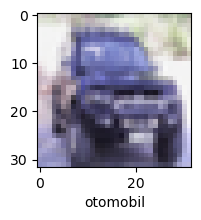

In [59]:
ornek(xtest,ytest,9)